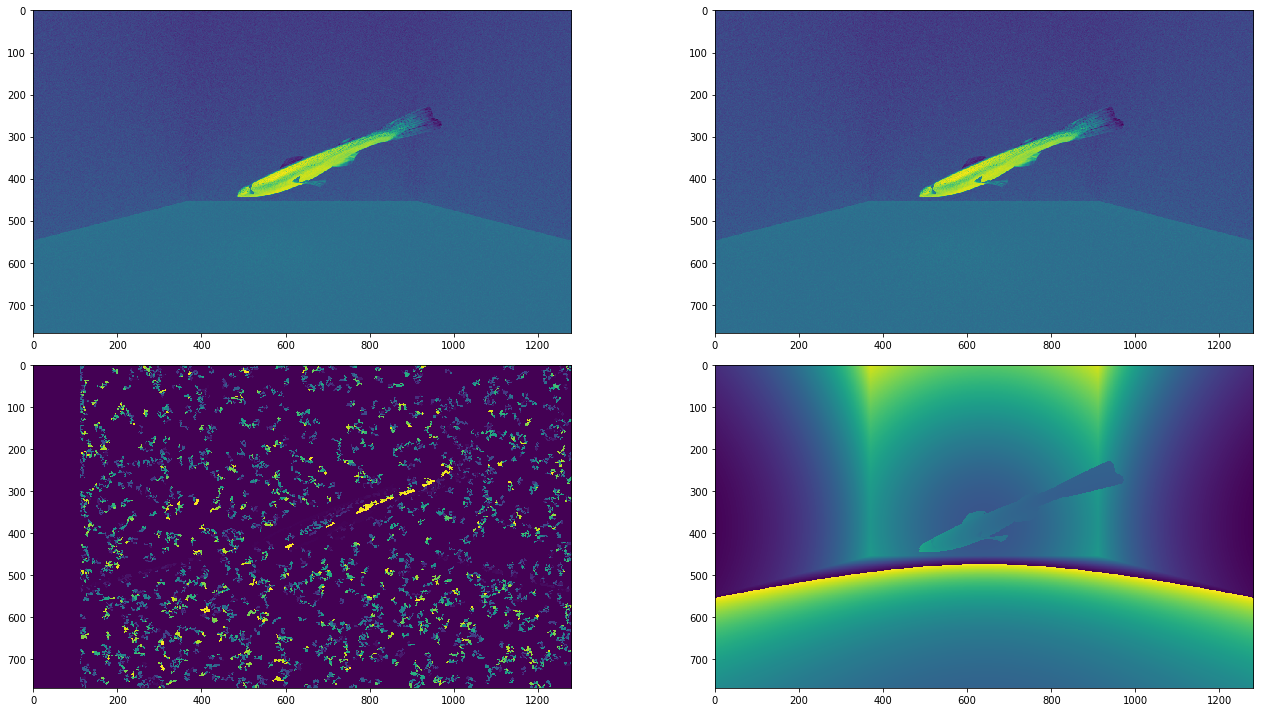

[[15. 15. 15. ... 15. 15. 15.]
 [15. 15. 15. ... 15. 15. 15.]
 [15. 15. 15. ... 15. 15. 15.]
 ...
 [15. 15. 15. ... 15. 15. 15.]
 [15. 15. 15. ... 15. 15. 15.]
 [15. 15. 15. ... 15. 15. 15.]]
[[ 33  33  33 ...  31  31  31]
 [ 33  33  33 ...  31  31  31]
 [ 33  33  33 ...  31  31  31]
 ...
 [124 124 123 ... 123 124 124]
 [123 123 123 ... 123 123 123]
 [123 123 123 ... 123 123 123]]


In [2]:
%matplotlib inline

import array
import numpy as np
import cv2
#import OpenEXR
#import Imath
import matplotlib.pyplot as plt

frame_path_left = '/root/data/depth_map/stereo/left_1.png'
frame_path_right = '/root/data/depth_map/stereo/right_1.png'
mask_path = '/root/data/depth_map/mask/mask_1.png'
depth_map_path = '/root/data/depth_map/dm/test_1_28.exr'

'''
file = OpenEXR.InputFile(depth_map_path)

# Compute the size
dw = file.header()['dataWindow']
sz = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

# Read the three color channels as 32-bit floats
FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
(R,G,B) = [array.array('f', file.channel(Chan, FLOAT)).tolist() for Chan in ("R", "G", "B") ]

# Normalize so that brightest sample is 1
brightest = max(R + G + B)
R = [ i / brightest for i in R ]
G = [ i / brightest for i in G ]
B = [ i / brightest for i in B ]

# Convert to strings
(Rs, Gs, Bs) = [ array.array('f', Chan).tostring() for Chan in (R, G, B) ]

# Write the three color channels to the output file
out = OpenEXR.OutputFile(depth_map_out_path, OpenEXR.Header(sz[0], sz[1]))
out.writePixels({'R' : Rs, 'G' : Gs, 'B' : Gs })
'''

imgL = cv2.imread(frame_path_left, 0)
imgR = cv2.imread(frame_path_right, 0)
mask = cv2.imread(mask_path, 0)
dm = cv2.imread(depth_map_path, 0)

f, ax = plt.subplots(2, 2, figsize = (20, 10))

ax[0][0].imshow(imgL)
ax[0][1].imshow(imgL)

stereo = cv2.StereoSGBM_create(minDisparity=16, numDisparities=96, blockSize=7, P1=32, P2=108, disp12MaxDiff=1, uniquenessRatio=10, speckleWindowSize=100, speckleRange=32)
disparity = stereo.compute(imgL, imgR) / 16.0

ax[1][0].imshow(disparity)
ax[1][1].imshow(dm)

plt.tight_layout()
plt.show()

print(disparity)
print(dm)

In [21]:
import os

depth_map_out_bin_path_1 = '/root/data/depth_map/dm/depth_map_1_1.bin'
depth_map_out_bin_path_2 = '/root/data/depth_map/dm/depth_map_1_2.bin'
depth_map_out_png_path = '/root/data/depth_map/dm/depth_map_1.png'

args = {
    'disp_max': 600,
    'depth_map_out_bin_path_1': depth_map_out_bin_path_1,
    'depth_map_out_bin_path_2': depth_map_out_bin_path_2,
    'depth_map_out_png_path': depth_map_out_png_path,
    'frame_path_left': frame_path_left,
    'frame_path_right': frame_path_right
}

command = 'th generate_depth_map.lua -net_fname /root/bryton/aquabyte_biomass/frame_depth_map/net_kitti_fast_-a_train_all.t7'
for key, val in args.items():
    if type(val) == list:
        value = ','.join(str(v) for v in val)
    else:
        value = val
    command += ' -{} {}'.format(key, value)

print(command)

os.chdir('/root/bryton/aquabyte_biomass/lib/mc-cnn')
os.system(command)

th generate_depth_map.lua -net_fname /root/bryton/aquabyte_biomass/frame_depth_map/net_kitti_fast_-a_train_all.t7 -disp_max 600 -depth_map_out_bin_path_1 /root/data/depth_map/dm/depth_map_1_1.bin -depth_map_out_bin_path_2 /root/data/depth_map/dm/depth_map_1_2.bin -depth_map_out_png_path /root/data/depth_map/dm/depth_map_1.png -frame_path_left /root/data/depth_map/stereo/left_1.png -frame_path_right /root/data/depth_map/stereo/right_1.png


256